Write a function that generates a choropleth map with 5 classes using the population attribute #4

In [ ]:
pip install folium

In [ ]:
!pip install geopandas

In [ ]:
pip install mapclassify

In [18]:
import folium
import json
import requests
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import mapclassify

In [19]:
plt.style.use('ggplot')

Read the polygon and point data and store them into a dataframe

In [20]:
#Load your data here
poly = "C:\\Users\\Dell 5401\\Documents\\GMT 320\\Assignments\\python-mapfactory\\country_boundaries_v2.json"
point = "C:\\Users\\Dell 5401\\Documents\\GMT 320\\Assignments\\python-mapfactory\\Poinst.geojson"

# DF
polys = gpd.read_file(poly)
points = gpd.read_file(point)

#Make sure both dataframes are in the same projection system

polys = polys.to_crs(epsg = 4326)
points = polys.to_crs(epsg = 4326)

<AxesSubplot:title={'center':'Add Map Title'}>

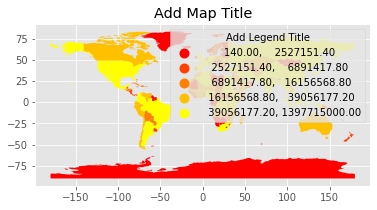

In [21]:
#Specify the map properties
Map_Title = "Add Map Title"
Leg_Title = "Add Legend Title"
column = "POP_EST" #DF Column that should be mapped
num_classes = 5
Scema = 'quantiles' #equal_interval, natural_breaks, Percentiles

#Function to create the map to display data within the polygon dataframe
def quantile(df, col, leg_title,Num_Classes, scema, Title):
    map = df.plot(column = col, scheme = scema, legend = True, legend_kwds = {'title': leg_title},cmap = 'autumn', k= Num_Classes)
    map.set_title(Title)
    return map

#Calling the function
quantile(polys, column, Leg_Title, num_classes, Scema, Map_Title)

In [ ]:
# Leverage GeoPandas Spatial Join to join the layers with intersection:

joined_df = gpd.sjoin(
    points,
    polys,
    how='inner',
    op='intersects',
)

#GroupBy SOVEREIGNT and use the unique id from the point data and rename the column

city_count_country = joined_df.groupby(
    ['SOVEREIGNT_left'], 
    as_index=False,
)['NAME_left'].count()

city_count_country.columns = ['SOVEREIGNT', 'city_Count']  # rename the column

#Merge this datafram to the original polygon dataframe

new = polys.merge(
    city_count_country, 
    on='SOVEREIGNT', 
    how='left', 
) 

Plot the dataframe with a function

<AxesSubplot:title={'center':'Add Map Title'}>

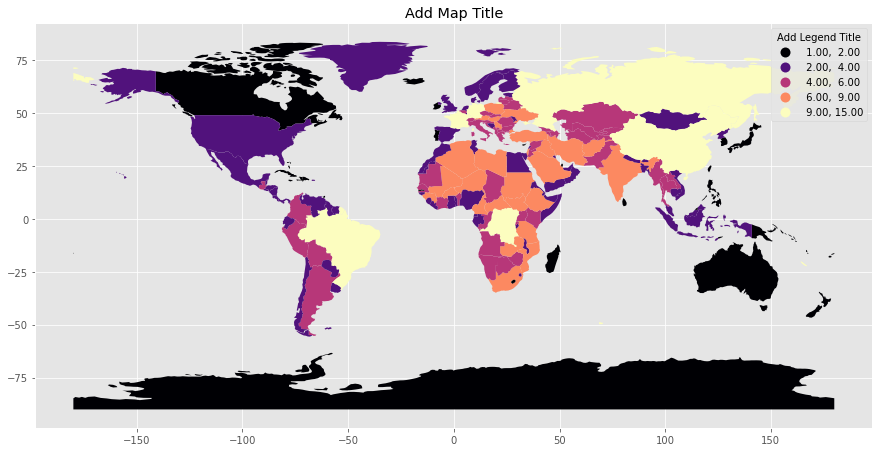

In [26]:
#Specify the map properties
Map_Title = "Add Map Title"
Leg_Title = "Add Legend Title"
column = "city_Count"
num_classes = 5
Scema = 'natural_breaks' #equal_interval, natural_breaks, Percentiles, quantiles

#Function to create the map
def quantile(col, k, Title, s, leg_title):
    map = new .plot(column= col, scheme = s, figsize=(15, 10), legend_kwds = {'title': leg_title}, cmap='magma', legend=True, k = num_classes)
    map.set_title(Title)
    return map

#Calling the function
quantile(column, num_classes, Map_Title, Scema, Leg_Title)